# Chapter 1 - Clustering for dataset exploration

Unsupervised learning finds patterns in data (e.g. clustsering customers by their purchases), without a specific prediction task in mind (unlike supervised learning, where we find patterns for a prediction task)

Dimension reduction: compressing the data using purchase patterns

Iris dataset:

- Samples are points in 4D space
- Dimension = no. of features (too high to visualise in this case - unsupervised learning gives insight)
- 3 species: setosa, versicolor, virginica (each having petal length, petal width, sepal length and sepal width features)

k-means clustering:

- Find clusters of samples
- Need to specify $k$ (no. of clusters)

## Scatter plots

We can create a scatter plot to visualise how many clusters there are.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
points = pd.read_csv('./datasets/points.csv', index_col=0).values

In [8]:
xs = points[:, 0]
ys = points[:, 1]

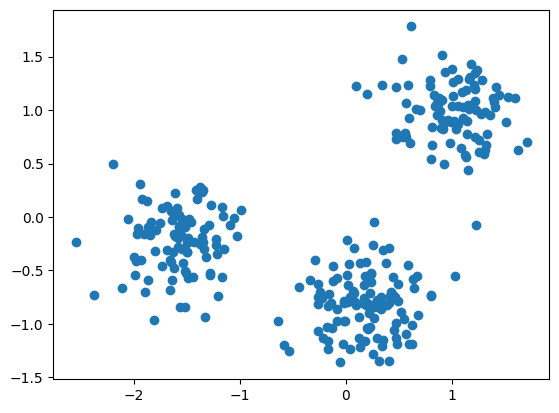

In [10]:
plt.scatter(xs, ys)

Here we can see 3 clusters.

## K-means model

Now, let's fit a KMeans model to find 3 clusters and fit to the `points` data.

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)
model.fit(points)

KMeans(n_clusters=3)

In [18]:
new_points = pd.read_csv('./datasets/new_points.csv', index_col=0).values

In [19]:
# Determine the cluster labels of new_points
labels = model.predict(new_points)

In [20]:
labels

array([2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2,
       1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2], d

Next, we will inspect the clustering to make it easier to interpret.

In [21]:
xs = new_points[:, 0]
ys = new_points[:, 1]

In [23]:
# Get the coordinates of the centroids
centroids = model.cluster_centers_

In [24]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

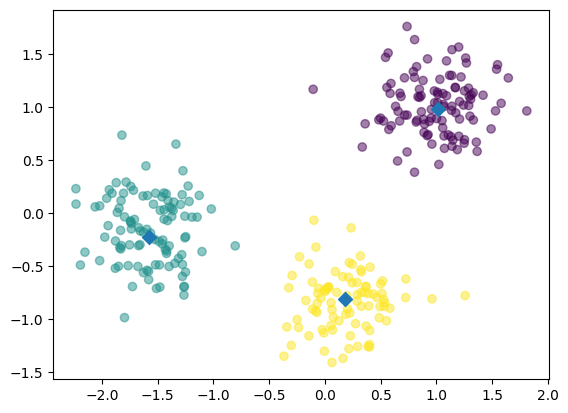

In [26]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

The clustering looks good. The nearest centroid to each new sample determines the cluster a particular data point belongs to.

Next, we will evaluate the quality of the clustering.

As we are given the iris species, we can check the clustering aligns with the number of species. However, if we don't have the species to check against, we need to measure the quality of a clustering (informs the choice of how many clusters to look for).

In [30]:
samples = pd.read_csv('./datasets/seeds.csv', header=None).values

In [34]:
ks = range(1, 6)
inertias = []

# Fit a k-means model with a different number of clusters k
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

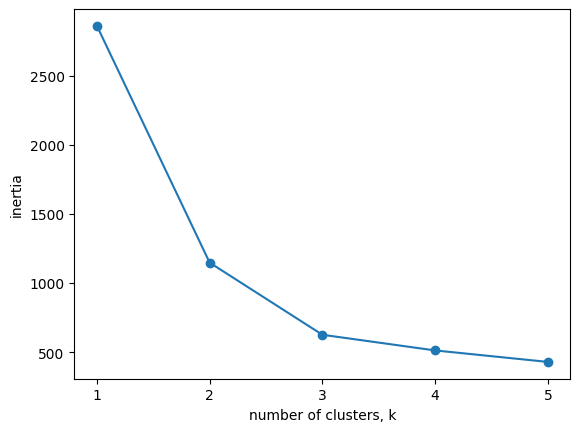

In [35]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

From the inertia plot the inertia decreases very slowly from 3 clusters to 4, so 3 would be a good choice for this data.

In [ ]:
# TODO: go back through the slides and append notes here
